# Catalog checks

This notebook is just to check things in the catalog.

job script options used for gdata storage/access:

```bash
"-l storage=gdata/xv83+gdata/gh0+gdata/oi10+gdata/dk92+gdata/hh5+gdata/rr3+gdata/al33+gdata/fs38+gdata/xp65"
```

## 1. Load packages

In [1]:
# Ignore warnings
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

In [2]:
# Load intake and cosima cookbook
import intake

# Load numpy for numbers!
import numpy as np

# Load pandas for DataFrame manipulations
import pandas as pd

In [3]:
catalogs = intake.cat.access_nri
catalogs

,model,description,realm,frequency,variable
name,,,,,
01deg_jra55v13_ryf9091,{ACCESS-OM2},{0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.3 RYF9091 repeat year forcing (May 1990 to Apr 1991)},"{seaIce, ocean}","{1day, 1mon, fx, 3mon, 3hr}","{ty_trans_nrho_submeso, mld, passive_weddell, bih_fric_v, shear_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, geolat_t, congel_m, temp_advection, average_T2, total_ocean_river, u_..."
01deg_jra55v140_iaf,{ACCESS-OM2},{Cycle 1 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, bih_fric_v, shear_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, congel_m, temp_xflux_adv_int_z, average_T2, total_ocean_river, u_do..."
01deg_jra55v140_iaf_cycle2,{ACCESS-OM2},{Cycle 2 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, bih_fric_v, shear_m, fresh_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, congel_m, melts, temp_xflux_adv_int_z, average_T2, total_o..."
01deg_jra55v140_iaf_cycle3,{ACCESS-OM2},{Cycle 3 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{1day, fx, 1mon}","{passive_weddell, mld, ty_trans_nrho_submeso, shear_m, fresh_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, congel_m, melts, temp_xflux_adv_int_z, average_T2, to..."
01deg_jra55v140_iaf_cycle4,{ACCESS-OM2},{Cycle 4 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.4.0 OMIP2 interannual forcing},"{seaIce, ocean}","{1day, 1mon, fx, 6hr, 3hr}","{radbio_int100, temp_xflux_adv_int_z, uarea, dxt, bmf_v, uvel_h, frazil, hu, bmf_u, runoff, o2, daidtt_m, algal_N_m, net_sfc_heating, zoo, vvel_m, time_bnds, dic_int100, ty_trans_rho, TLAT, phy, a..."
01deg_jra55v140_iaf_cycle4_jra55v150_extension,{ACCESS-OM2},{Extensions of cycle 4 of 0.1 degree ACCESS-OM2 + WOMBAT BGC global model configuration with JRA55-do v1.5.0 and v1.5.0.1 interannual forcing},"{seaIce, ocean}","{subhr, 1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, shear_m, fresh_m, total_ocean_heat, adic_xflux_adv, strairy_m, surface_phy, radbio_int100, sfc_hflux_coupler, fe_int100, no3_xflux_adv, mh_flux, dic_zflux_adv, phy_int..."
01deg_jra55v150_iaf_cycle1,{ACCESS-OM2},{Cycle 1 of 0.1 degree ACCESS-OM2 global model configuration with JRA55-do v1.5.0 OMIP2 interannual forcing},"{seaIce, ocean}","{1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, temp_xflux_adv_int_z, average_T2, frazil_3d_int_z, wfiform, dxt, tau_y, bmf_v, kmu, hu, time_bounds, bmf_u, tau_x, ht..."
025deg_era5_iaf,{ACCESS-OM2},{0.25 degree ACCESS-OM2 global model configuration with ERA5 interannual\nforcing (1980-2021)},"{seaIce, ocean}","{1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, shear_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, fcondtopn_ai_m, congel_m, temp_yflux_ndiffuse_int_z, temp_xflux_adv_int_z, aver..."
025deg_era5_ryf,{ACCESS-OM2},{0.25 degree ACCESS-OM2 global model configuration with ERA5 RYF9091 repeat\nyear forcing (May 1990 to Apr 1991)},"{seaIce, ocean}","{1day, fx, 1mon}","{ty_trans_nrho_submeso, mld, shear_m, total_ocean_heat, strairy_m, drag_coeff, sfc_hflux_coupler, mh_flux, geolat_t, fcondtopn_ai_m, congel_m, temp_yflux_ndiffuse_int_z, temp_xflux_adv_int_z, aver..."


In [4]:
catalogs.search(name='cmip.*')

,model,description,realm,frequency,variable
name,,,,,
cmip5_al33,"{FGOALS-gl, CanESM2, IPSL-CM5A-MR, CSIRO-QCCCE-CSIRO-Mk3-6-0, CMCC-CESM, MIROC-ESM-CHEM, GFDL-ESM2M, bcc-csm1-1, HadGEM2-ES, ECMWF-ERAINT, NOAA-GFDL-GFDL-ESM2M, CMCC-CM, GFDL-ESM2G, CNRM-CM5-2, MP...",{Replicated CMIP5-era datasets catalogued by NCI},"{atmos, seaIce, ocean, ocnBgchem, aerosol, none, land, landIce}","{1mon, 1day, fx, 6hr, subhr, 1yr, 3hr}","{ccb, ua400, evu, po4, intpbsi, tnsccwif, tnsclirir, snw, hcice, loadnh4, treeFracSecDec, uo, loadsoa, wmo, cl, fbddtdin, rld4co2, concss, omldamax, tnsclimcl, gridspec, intpdiat, epc100, intpmisc..."
cmip5_rr3,"{CanESM2, IPSL-CM5A-MR, MIROC-ESM-CHEM, GFDL-ESM2M, ECMWF-ERAINT, NOAA-GFDL-GFDL-CM3, NOAA-GFDL-GFDL-ESM2M, ACCESS1-3, GFDL-ESM2G, CSIRO-BOM-ACCESS1-0, bcc-csm1-1-m, MIROC5, IPSL-CM5A-LR, CCSM4, M...",{Australian CMIP5-era datasets catalogued by NCI},"{atmos, seaIce, ocean, aerosol, none, land, landIce}","{1mon, 1day, fx, 6hr, 1hr, 3mon, 3hr}","{zg750, masscello, rldscs, residualFrac, concdust, phalf, mrro, rhs, pbo, sic, rsutcs, mc, lai, rsdsdiff, snw, cldncl, hus, tasmax-bc, rsdt, rsdscs, uo, zg650, mrros, loadsoa, sst, wmo, cl, concss..."
cmip6_fs38,"{ACCESS-OM2, ACCESS-OM2-025, ACCESS-CM2, ACCESS-ESM1-5}",{Australian CMIP6-era datasets catalogued by NCI},"{atmos, seaIce, ocean, ocnBgchem, aerosol, land, landIce}","{1mon, 1day, fx, 6hr, 1yr, 3hr}","{sifllwdtop, sisnconc, po4, snw, uo, wmo, cl, rls, omldamax, fNdep, epc100, rlut, siflcondtop, hfbasinpmadv, o2, ocontemppsmadvect, nLitter, cSoil, treeFrac, mfo, fNup, gpp, sistrydtop, sftof, sid..."
cmip6_oi10,"{MRI-AGCM3-2-S, KIOST-ESM, GFDL-ESM2M, EC-Earth3-HR, CAS-ESM2-0, BCC-CSM2-MR, CESM2-FV2, GFDL-AM4, TaiESM1-TIMCOM2, MRI-ESM2-0, TaiESM1, ECMWF-IFS-MR, INM-CM5-0, CAMS-CSM1-0, GISS-E2-1-G, UKESM1-0...",{Replicated CMIP6-era datasets catalogued by NCI},"{atmos, seaIce, ocean, ocnBgchem, aerosol, land, atmosChem, landIce}","{1mon, 1day, fx, 6hr, subhr, 1hr, 1yr, 3hr}","{ccb, po4, opottemppmdiff, snw, uo, fracOutLut, wmo, cl, fAnthDisturb, rls, omldamax, fNdep, rlut, bldep, hfbasinpmadv, o2, nLitter, cSoil, wfonocorr, mfo, treeFrac, hfgeou, mrsofc, cTotFireLut, f..."


In [5]:
# Load catalog
cat_cmip6_Rep = catalogs["cmip6_oi10"]
cat_cmip6_Rep

,unique
path,3316676
file_type,2
realm,14
frequency,12
table_id,32
project_id,16
institution_id,36
source_id,104
experiment_id,79
member_id,6520


In [6]:
cat_cmip6_Aus = catalogs["cmip6_fs38"]
cat_cmip6_Aus

,unique
path,1054133
file_type,2
realm,7
frequency,10
table_id,24
project_id,1
institution_id,3
source_id,4
experiment_id,52
member_id,80


In [7]:
cat_cmip5_Aus = catalogs["cmip5_rr3"]
cat_cmip5_Aus

,unique
path,2858922
file_type,2
project,4
institute,8
model,36
experiment,27
frequency,7
realm,7
table,12
ensemble,71


In [8]:
cat_cmip5_Rep = catalogs["cmip5_al33"]
cat_cmip5_Rep

,unique
path,3700255
file_type,2
project,3
institute,62
model,74
experiment,94
frequency,9
realm,9
table,20
ensemble,240


In [9]:
# PANGEO_catalog_url = "https://storage.googleapis.com/cmip6/cmip6-pgf-ingestion-test/catalog/catalog.json" # Only stores that pass current tests
PANGEO_catalog_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat_cmip6_Pangeo = intake.open_esm_datastore(PANGEO_catalog_url)
cat_cmip6_Pangeo

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


Testing xgcm for interpolating corner `uo`/`vo` to u,v positions (where `umo`/`vmo` are)

In [11]:
test_cat = cat_cmip6_Rep.search(
    experiment_id = "historical",
    source_id = "CESM2-FV2",
    member_id = "r1i1p1f1",
    variable_id = ["volcello"],
)
test_cat

,unique
path,2
file_type,1
realm,1
frequency,1
table_id,1
project_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1


In [6]:
uo_cat = cat_cmip6_Aus.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = ["uo"],
    file_type = "l",
)

In [7]:

import xarray as xr
uo_ds = xr.open_mfdataset(uo_cat.df.path)

In [25]:
import datetime
uo_sel = uo_ds["uo"].sel(time=datetime.datetime(2000, 1, 1), method='nearest')
uo_sel

<xarray.DataArray 'uo' (lev: 50, j: 300, i: 360)> Size: 22MB
dask.array<getitem, shape=(50, 300, 360), dtype=float32, chunksize=(25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2000-01-16T12:00:00
  * lev        (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_x_velocity
    long_name:      Sea Water X Velocity
    comment:        Prognostic x-ward velocity component resolved by the model.
    units:          m s-1
    cell_methods:   time: mean
    history:        2019-11-15T15:41:19Z altered by CMOR: replaced missing va...

In [ ]:
import xmip

List all the models in the catalog:

In [6]:
models = np.sort(cat_cmip6_Pangeo.df.source_id.unique())
print(*models, sep = "\n")

ACCESS-CM2
ACCESS-ESM1-5
AWI-CM-1-1-MR
AWI-ESM-1-1-LR
BCC-CSM2-HR
BCC-CSM2-MR
BCC-ESM1
CAMS-CSM1-0
CAS-ESM2-0
CESM1-1-CAM5-CMIP5
CESM1-WACCM-SC
CESM2
CESM2-FV2
CESM2-WACCM
CESM2-WACCM-FV2
CIESM
CMCC-CM2-HR4
CMCC-CM2-SR5
CMCC-CM2-VHR4
CMCC-ESM2
CNRM-CM6-1
CNRM-CM6-1-HR
CNRM-ESM2-1
CanESM5
CanESM5-CanOE
E3SM-1-0
E3SM-1-1
E3SM-1-1-ECA
EC-Earth3
EC-Earth3-AerChem
EC-Earth3-CC
EC-Earth3-LR
EC-Earth3-Veg
EC-Earth3-Veg-LR
EC-Earth3P
EC-Earth3P-HR
EC-Earth3P-VHR
ECMWF-IFS-HR
ECMWF-IFS-LR
FGOALS-f3-H
FGOALS-f3-L
FGOALS-g3
FIO-ESM-2-0
GFDL-AM4
GFDL-CM4
GFDL-CM4C192
GFDL-ESM2M
GFDL-ESM4
GFDL-OM4p5B
GISS-E2-1-G
GISS-E2-1-G-CC
GISS-E2-1-H
GISS-E2-2-G
GISS-E2-2-H
HadGEM3-GC31-HM
HadGEM3-GC31-LL
HadGEM3-GC31-LM
HadGEM3-GC31-MM
ICON-ESM-LR
IITM-ESM
INM-CM4-8
INM-CM5-0
INM-CM5-H
IPSL-CM5A2-INCA
IPSL-CM6A-ATM-HR
IPSL-CM6A-LR
IPSL-CM6A-LR-INCA
KACE-1-0-G
KIOST-ESM
MCM-UA-1-0
MIROC-ES2H
MIROC-ES2L
MIROC6
MPI-ESM-1-2-HAM
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MPI-ESM1-2-XR
MRI-AGCM3-2-H
MRI-AGCM3-2-S
MRI-ESM2-0
NESM3

### Let's check where are the `volcello` and `areacello` files (fixed or monthly)?

In [6]:
volcello_frequencies = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "volcello",
).df.table_id.unique()

areacello_frequencies = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "areacello",
).df.table_id.unique()

print("volcello frequencies: ", volcello_frequencies)
print("areacello frequencies: ", areacello_frequencies)

volcello frequencies:  ['Omon' 'Ofx']
areacello frequencies:  ['Ofx']


So `volcello` is both available as fixed and monthly and `areacello` only as fixed. For simplicity, I'll use the fixed version in both cases, but maybe this is not a good idea (I added this check as an item to my TODO list). 

Location of the fixed files are given by:

In [7]:
volcello_path = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "volcello",
    table_id = "Ofx",
).df.path[0]

areacello_path = cat.search(
    experiment_id = "historical",
    source_id = "ACCESS-ESM1-5",
    member_id = "r1i1p1f1",
    variable_id = "areacello",
    table_id = "Ofx",
).df.path[0]

print("volcello path: ", volcello_path)
print("areacello path: ", areacello_path)

volcello path:  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Ofx/volcello/gn/files/d20191115/volcello_Ofx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc
areacello path:  /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Ofx/areacello/gn/files/d20191115/areacello_Ofx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc


In [8]:
cat.search(
    source_id = "ACCESS-ESM1-5",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
).df.member_id.unique()

array(['r29i1p1f1', 'r21i1p1f1', 'r1i1p1f1', 'r39i1p1f1', 'r31i1p1f1',
       'r4i1p1f1', 'r13i1p1f1', 'r27i1p1f1', 'r30i1p1f1', 'r2i1p1f1',
       'r38i1p1f1', 'r37i1p1f1', 'r23i1p1f1', 'r15i1p1f1', 'r28i1p1f1',
       'r17i1p1f1', 'r16i1p1f1', 'r19i1p1f1', 'r9i1p1f1', 'r36i1p1f1',
       'r22i1p1f1', 'r26i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r40i1p1f1',
       'r5i1p1f1', 'r20i1p1f1', 'r14i1p1f1', 'r6i1p1f1', 'r32i1p1f1',
       'r33i1p1f1', 'r11i1p1f1', 'r34i1p1f1', 'r25i1p1f1', 'r12i1p1f1',
       'r18i1p1f1', 'r3i1p1f1', 'r10i1p1f1', 'r24i1p1f1', 'r35i1p1f1'],
      dtype=object)

In [9]:
cat.search(
    source_id = "ACCESS-CM2",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
).df.member_id.unique()

array(['r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1', 'r10i1p1f1', 'r6i1p1f1',
       'r3i1p1f1', 'r5i1p1f1', 'r4i1p1f1', 'r2i1p1f1', 'r1i1p1f1'],
      dtype=object)

In [104]:
foo = cat.search(
    source_id = "ACCESS-CM2",
    experiment_id = "piControl",
    realm = "ocean",
    variable_id = "agessc",
    file_type = "l",
)
foo.df.time_range

0     131001-131912
1     098001-098912
2     133001-133912
3     144001-144912
4     129001-129912
5     125001-125912
6     135001-135912
7     109001-109912
8     143001-143912
9     096001-096912
10    139001-139912
11    116001-116912
12    114001-114912
13    107001-107912
14    101001-101912
15    140001-140912
16    105001-105912
17    111001-111912
18    110001-110912
19    137001-137912
20    122001-122912
21    103001-103912
22    108001-108912
23    099001-099912
24    136001-136912
25    104001-104912
26    119001-119912
27    124001-124912
28    130001-130912
29    106001-106912
30    141001-141912
31    123001-123912
32    100001-100912
33    097001-097912
34    127001-127912
35    121001-121912
36    113001-113912
37    112001-112912
38    118001-118912
39    134001-134912
40    128001-128912
41    142001-142912
42    120001-120912
43    115001-115912
44    095001-095912
45    126001-126912
46    132001-132912
47    102001-102912
48    117001-117912
49    138001-138912


In [60]:
agescc_path = cat.search(
    source_id = "ACCESS-CM2",
    experiment_id = "historical",
    realm = "ocean",
    variable_id = "agessc",
    member_id = "r7i1p1f1",
).df.path[1]
agescc_path

'/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r7i1p1f1/Omon/agessc/gn/files/d20220819/agessc_Omon_ACCESS-CM2_historical_r7i1p1f1_gn_201001-201412.nc'

In [61]:
import xarray as xr

In [22]:
# ds = xr.open_mfdataset(foo.df.path)
# # ds = xr.open_dataset(agescc_path)
# ds

In [63]:
import datetime

In [105]:
age2D = ds["agessc"].sel(time=datetime.datetime(2000, 1, 1), lev=1000, method='nearest')
age2D

<xarray.DataArray 'agessc' (j: 300, i: 360)> Size: 432kB
dask.array<getitem, shape=(300, 360), dtype=float32, chunksize=(150, 180), chunktype=numpy.ndarray>
Coordinates:
    time       object 8B 1449-12-16 12:00:00
    lev        float64 8B 969.1
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Attributes:
    standard_name:  sea_water_age_since_surface_contact
    long_name:      Sea Water Age Since Surface Contact
    comment:        Time elapsed since water was last in surface layer of the...
    units:          yr
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello volume: volcello
    history:        2019-11-12T14:59:25Z altered by CMOR: replaced missing va...

In [102]:
import matplotlib as plt

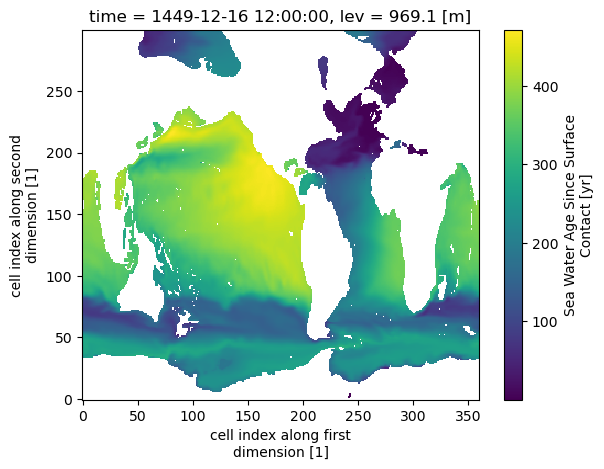

In [103]:
age2D.plot()

List of members

In [10]:
members = np.sort(cat.search(source_id = model, realm = 'ocean').df.member_id.unique())
print(*members, sep = "\n")

NameError: name 'model' is not defined

In [7]:
def list_models_and_members_that_have(cat, variables):
    """
    find the list of models and their members that have all the variables.
    """
    # Step 1: Filter the dataframe to include only the specified variables
    filtered_df = cat.search(variable_id = variables).df

    # Step 2: Group by 'model' and 'member'
    grouped = filtered_df.groupby(['source_id', 'member_id'])

    # Step 3: Find groups that contain ALL variables
    valid_groups = grouped.filter(lambda x: set(variables).issubset(set(x['variable_id'])))

    # Step 4: Get the list of models and their members
    result = valid_groups[['source_id', 'member_id']].drop_duplicates().reset_index(drop=True)

    # Step 5: Sort the result by model
    result_sorted = result.sort_values(by='source_id')

    # Setp 6: Regroup by model
    grouped_result_sorted = result_sorted.groupby('source_id')

    return grouped_result_sorted.apply(display)

In [27]:
def summary_variable_availability(df, cmip_version):

    if cmip_version == "CMIP6":
        variable_id = 'variable_id'
        experiment_id = 'experiment_id'
        source_id = 'source_id'
        member_id = 'member_id'
        list1 = ['umo', 'vmo', 'mlotst', 'volcello', 'areacello']
        list2 = ['uo', 'vo', 'mlotst', 'volcello', 'areacello']
    elif cmip_version == "CMIP5":
        variable_id = 'variable'
        experiment_id = 'experiment'
        source_id = 'model'
        member_id = 'ensemble'
        list1 = ['umo', 'vmo', 'mlotst']
        list2 = ['uo', 'vo', 'mlotst']
        # (Note Removed volcello and areacello because could be in different member: r0i0p0)

    # umo_vmo_list = ['umo', 'vmo', 'mlotst']
    # uo_vo_list = ['uo', 'vo', 'mlotst']
    # grid_list = ['volcello', 'areacello']


    # filtered_df =  df[df[variable_id].isin(umo_vmo_list + uo_vo_list + grid_list)
    # umo_vmo_df = filtered_df[filtered_df[variable_id].isin(umo_vmo_list)
    # uo_vo_df = filtered_df[filtered_df[variable_id].isin(uo_vo_list)
    # grid_df = filtered_df[filtered_df[variable_id].isin(grid_list)


    # filter (model,experiment,member) that have either umo+vmo+mlotst or uo+vo+mlotst




    # Step 1: Filter the dataframe to include only the specified variables
    filtered_df_1 = df[df[variable_id].isin(list1)]
    filtered_df_2 = df[df[variable_id].isin(list2)]

    # Step 2: Group by 'source_id' and 'member_id'
    grouped_1 = filtered_df_1.groupby([experiment_id, source_id, member_id])
    grouped_2 = filtered_df_2.groupby([experiment_id, source_id, member_id])

    # Step 3: Find groups that contain all the variables in each set
    valid_groups_1 = grouped_1.filter(lambda x: set(list1).issubset(set(x[variable_id])))
    valid_groups_2 = grouped_2.filter(lambda x: set(list2).issubset(set(x[variable_id])))

    # Step 4: Get the list of source_id and their member_id for each set
    result_1 = valid_groups_1[[experiment_id, source_id, member_id]].drop_duplicates().reset_index(drop=True)
    result_2 = valid_groups_2[[experiment_id, source_id, member_id]].drop_duplicates().reset_index(drop=True)

    # Step 5: Group by 'source_id' and aggregate member_id into a list for each set
    final_result_1 = result_1.groupby([experiment_id, source_id])[member_id].apply(list).reset_index()
    final_result_2 = result_2.groupby([experiment_id, source_id])[member_id].apply(list).reset_index()

    # Step 6: Merge the results into a single dataframe
    merged_result = pd.merge(final_result_1, final_result_2, on=[experiment_id, source_id], how='outer', suffixes=('_umo_vmo', '_uo_vo'))

    return merged_result

In [28]:
df = cat_cmip6_Pangeo.df

variable_id = 'variable_id'
experiment_id = 'experiment_id'
source_id = 'source_id'
member_id = 'member_id'

# Step 1: Filter the dataframe to include only the specified variables
filtered_df_1 = df[df[variable_id].isin(['umo', 'vmo', 'mlotst', 'volcello', 'areacello'])]
filtered_df_2 = df[df[variable_id].isin(['uo', 'vo', 'mlotst', 'volcello', 'areacello'])]

# Step 2: Group by 'source_id' and 'member_id'
grouped_1 = filtered_df_1.groupby([experiment_id, source_id, member_id])
grouped_2 = filtered_df_2.groupby([experiment_id, source_id, member_id])

# Step 3: Find groups that contain all the variables in each set
valid_groups_1 = grouped_1.filter(lambda x: set(['umo', 'vmo', 'mlotst', 'volcello', 'areacello']).issubset(set(x[variable_id])))
valid_groups_2 = grouped_2.filter(lambda x: set(['uo', 'vo', 'mlotst', 'volcello', 'areacello']).issubset(set(x[variable_id])))

# Step 4: Get the list of source_id and their member_id for each set
result_1 = valid_groups_1[[experiment_id, source_id, member_id]].drop_duplicates().reset_index(drop=True)
result_2 = valid_groups_2[[experiment_id, source_id, member_id]].drop_duplicates().reset_index(drop=True)

# Step 5: Group by 'source_id' and aggregate member_id into a list for each set
final_result_1 = result_1.groupby([experiment_id, source_id])[member_id].apply(list).reset_index()
final_result_2 = result_2.groupby([experiment_id, source_id])[member_id].apply(list).reset_index()

# Step 6: Merge the results into a single dataframe
merged_result = pd.merge(final_result_1, final_result_2, on=[experiment_id, source_id], how='outer', suffixes=('_umo_vmo', '_uo_vo'))


In [29]:
summary_variable_availability(cat_cmip6_Pangeo.df, cmip_version="CMIP6")

,experiment_id,source_id,member_id_umo_vmo,member_id_uo_vo
0,1pctCO2,ACCESS-CM2,[r1i1p1f1],[r1i1p1f1]
1,1pctCO2,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
2,1pctCO2,BCC-ESM1,[r1i1p1f1],[r1i1p1f1]
3,1pctCO2,CMCC-CM2-SR5,[r1i1p1f1],[r1i1p1f1]
4,1pctCO2,MPI-ESM-1-2-HAM,[r1i1p1f1],[r1i1p1f1]
5,1pctCO2,MPI-ESM1-2-HR,[r1i1p1f1],[r1i1p1f1]
6,1pctCO2,MPI-ESM1-2-LR,[r1i1p1f1],NaN
7,1pctCO2,NorCPM1,[r1i1p1f1],NaN
8,1pctCO2,NorESM2-MM,[r1i1p1f1],[r1i1p1f1]
9,abrupt-4xCO2,ACCESS-CM2,[r1i1p1f1],[r1i1p1f1]


In [30]:
summary_variable_availability(cat_cmip6_Aus.df, cmip_version="CMIP6")

,experiment_id,source_id,member_id_umo_vmo,member_id_uo_vo
0,1pctCO2,ACCESS-CM2,[r1i1p1f1],[r1i1p1f1]
1,1pctCO2,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
2,1pctCO2-bgc,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
3,1pctCO2-rad,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
4,abrupt-4xCO2,ACCESS-CM2,[r1i1p1f1],[r1i1p1f1]
5,abrupt-4xCO2,ACCESS-ESM1-5,"[r1i1p1f1, r2i1p1f1]","[r2i1p1f1, r1i1p1f1]"
6,esm-1pct-brch-1000PgC,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
7,esm-1pct-brch-2000PgC,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
8,esm-1pct-brch-750PgC,ACCESS-ESM1-5,[r1i1p1f1],[r1i1p1f1]
9,esm-hist,ACCESS-ESM1-5,"[r7i1p1f1, r1i1p1f1, r10i1p1f1, r9i1p1f1, r4i1p1f1, r8i1p1f1, r6i1p1f1, r2i1p1f1, r3i1p1f1, r5i1p1f1]","[r7i1p1f1, r5i1p1f1, r1i1p1f1, r10i1p1f1, r9i1p1f1, r8i1p1f1, r3i1p1f1, r4i1p1f1, r6i1p1f1, r2i1p1f1]"


In [35]:
CMIP6_Rep_df = summary_variable_availability(cat_cmip6_Rep.df, cmip_version="CMIP6")
CMIP6_Rep_df

,experiment_id,source_id,member_id_umo_vmo,member_id_uo_vo
0,historical,CMCC-CM2-HR4,[r1i1p1f1],[r1i1p1f1]
1,historical,CMCC-CM2-SR5,[r1i1p1f1],[r1i1p1f1]
2,historical,CMCC-ESM2,[r1i1p1f1],[r1i1p1f1]
3,historical,FGOALS-f3-L,[r1i1p1f1],[r1i1p1f1]
4,historical,FGOALS-g3,[r1i1p1f1],[r1i1p1f1]
5,historical,MPI-ESM-1-2-HAM,[r1i1p1f1],[r1i1p1f1]
6,historical,MPI-ESM1-2-HR,[r1i1p1f1],[r1i1p1f1]
7,historical,MPI-ESM1-2-LR,[r1i1p1f1],[r1i1p1f1]
8,historical,NorCPM1,[r1i1p1f1],[r1i1p1f1]
9,historical,NorESM2-LM,[r1i1p1f1],[r1i1p1f1]


In [36]:
CMIP6_Rep_df.source_id.unique()

array(['CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'FGOALS-f3-L',
       'FGOALS-g3', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
       'NorCPM1', 'NorESM2-LM', 'NorESM2-MM', 'CESM2', 'CESM2-FV2',
       'CESM2-WACCM-FV2', 'TaiESM1-TIMCOM'], dtype=object)

In [32]:
summary_variable_availability(cat_cmip5_Aus.df, cmip_version="CMIP5")

,experiment,model,ensemble_umo_vmo,ensemble_uo_vo
0,1pctCO2,ACCESS1-0,[r1i1p1],[r1i1p1]
1,1pctCO2,ACCESS1-3,[r1i1p1],[r1i1p1]
2,1pctCO2,CSIRO-Mk3-6-0,[r1i1p1],[r1i1p1]
3,abrupt4xCO2,ACCESS1-0,[r1i1p1],[r1i1p1]
4,abrupt4xCO2,ACCESS1-3,[r1i1p1],[r1i1p1]
5,abrupt4xCO2,CSIRO-Mk3-6-0,[r1i1p1],[r1i1p1]
6,historical,ACCESS1-0,"[r1i1p1, r3i1p1, r2i1p1]","[r1i1p1, r2i1p1, r3i1p1]"
7,historical,ACCESS1-3,"[r1i1p1, r2i1p1, r3i1p1]","[r2i1p1, r3i1p1, r1i1p1]"
8,historical,CSIRO-Mk3-6-0,"[r9i1p1, r8i1p1, r1i1p1, r10i1p1, r5i1p1, r7i1p1, r6i1p1, r3i1p1, r2i1p1, r4i1p1]","[r8i1p1, r9i1p1, r7i1p1, r4i1p1, r5i1p1, r1i1p1, r3i1p1, r10i1p1, r6i1p1, r2i1p1]"
9,historicalExt,ACCESS1-0,"[r2i1p1, r3i1p1]","[r2i1p1, r3i1p1]"


In [33]:
CMIP5_Rep_df = summary_variable_availability(cat_cmip5_Rep.df, cmip_version="CMIP5")
CMIP5_Rep_df

,experiment,model,ensemble_umo_vmo,ensemble_uo_vo
0,historicalGHG,GFDL-CM3,"[r1i1p1, r3i1p1]","[r1i1p1, r5i1p1, r3i1p1]"
1,historicalGHG,GFDL-ESM2M,[r1i1p1],[r1i1p1]
2,historicalMisc,GFDL-CM3,"[r1i1p1, r5i1p2, r1i1p2, r3i1p1, r3i1p2, r5i1p1]","[r5i1p2, r1i1p1, r3i1p2, r1i1p2, r3i1p1, r5i1p1]"
3,historicalMisc,GFDL-ESM2M,"[r1i1p3, r1i1p8, r1i1p2, r1i1p7, r1i1p4, r1i1p5, r1i1p6]","[r1i1p3, r1i1p4, r1i1p7, r1i1p2, r1i1p5, r1i1p8, r1i1p6]"
4,historicalNat,GFDL-CM3,"[r1i1p1, r3i1p1, r5i1p1]","[r1i1p1, r5i1p1, r3i1p1]"
5,historicalNat,GFDL-ESM2M,[r1i1p1],[r1i1p1]
6,piControl,CNRM-CM5,[r1i1p1],[r1i1p1]
7,piControl,MRI-CGCM3,[r1i1p1],[r1i1p1]
8,piControl,NorESM1-M,[r1i1p1],[r1i1p1]
9,rcp26,NorESM1-M,[r1i1p1],[r1i1p1]


In [ ]:
CMIP5_Rep_df.source_id.unique()

In [34]:
list_models_and_members_that_have(cat, ['umo', 'vmo', 'mlotst'])

NameError: name 'list_models_and_members_that_have' is not defined

In [16]:
ensemble = "r1i1p1f1"

In [17]:
year_start = 1990
num_years = 10

In [18]:
def variable_availability_check(cat, **kwargs):
    """
    List the relevant variables available and if more is needed.
    """
    searched_cat = cat.search(**kwargs)
    umo_cat = searched_cat.search(variable_id = "umo")
    vmo_cat = searched_cat.search(variable_id = "vmo")
    mlotstmo_cat = searched_cat.search(variable_id = "mlotst")

    print("\numo:\n")
    print(available_time_window(umo_cat))
    print("\nvmo:\n")
    print(available_time_window(vmo_cat))
    print("\nmlotst:\n")
    print(available_time_window(mlotstmo_cat))

    return


def available_time_window(cat):
    time_ranges = cat.df.time_range.unique()
    idx = np.argsort([int(foo[0:4]) for foo in time_ranges if foo != 'na'])
    # return time_ranges[idx]
    return time_ranges[idx]

In [19]:
model, experiment, ensemble

('ACCESS-ESM1-5', 'historical', 'r1i1p1f1')

In [20]:
variable_availability_check(cat,
    source_id = model,
    experiment_id = experiment,
    member_id = ensemble,
    realm = 'ocean'
)


umo:

['185001-185912' '186001-186912' '187001-187912' '188001-188912'
 '189001-189912' '190001-190912' '191001-191912' '192001-192912'
 '193001-193912' '194001-194912' '195001-195912' '196001-196912'
 '197001-197912' '198001-198912' '199001-199912' '200001-200912'
 '201001-201412']

vmo:

['185001-185912' '186001-186912' '187001-187912' '188001-188912'
 '189001-189912' '190001-190912' '191001-191912' '192001-192912'
 '193001-193912' '194001-194912' '195001-195912' '196001-196912'
 '197001-197912' '198001-198912' '199001-199912' '200001-200912'
 '201001-201412']

mlotst:

['185001-201412']


In [21]:
# Check that catalog contains the data requested before creating empty directories
searched_cat = cat.search(
    source_id = model,
    experiment_id = experiment,
    member_id = ensemble,
    variable_id = ["umo", "vmo", "mlotst"],
    realm = 'ocean')
np.sort(searched_cat.df.source_id.unique())

array(['ACCESS-ESM1-5'], dtype=object)

In [22]:
searched_searched_cat = searched_cat.search(variable_id = "uo")
searched_searched_cat.df.variable_id.unique()

array([], dtype=object)

In [23]:
np.sort([int(foo[0:4]) for foo in searched_cat.df.time_range.unique() if foo != 'na'])

array([1850, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940,
       1950, 1960, 1970, 1980, 1990, 2000, 2010])

In [28]:
# Create directory on gdata
datadir = '/scratch/xv83/TMIP/data'
start_time, end_time = time_window_strings(year_start, num_years)
start_time_str = start_time.strftime("%b%Y")
end_time_str = end_time.strftime("%b%Y")

outputdir = f'{datadir}/{model}/{experiment}/{ensemble}/{start_time_str}-{end_time_str}'
print(outputdir)

/scratch/xv83/TMIP/data/ACCESS-ESM1-5/historical/r1i1p1f1/Jan1990-Dec1999


In [29]:
makedirs(outputdir, exist_ok=True)

In [30]:
########## Start the client and make the `.nc` files ##########
print("Starting client")
client = Client(n_workers=4)#, threads_per_worker=1, memory_limit='16GB') # Note: with 1thread/worker cannot plot thetao. Maybe I need to understand why?
client

Starting client


In [31]:
# umo dataset
print("Loading umo data")
umo_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "umo",
    frequency = "mon",
)
print("\numo_datadask: ", umo_datadask)

Loading umo data

umo_datadask:  <xarray.Dataset> Size: 43GB
Dimensions:             (time: 1980, lev: 50, j: 300, i: 360, bnds: 2,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(120, 2), meta=np.ndarray>
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
    lev_bnds            (lev, bnds) float64 800B dask.array<chunksize=(50, 2), meta=np.ndarray>
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    

In [32]:
# vmo dataset
print("Loading vmo data")
vmo_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "vmo",
    frequency = "mon",
)
print("\nvmo_datadask: ", vmo_datadask)

Loading vmo data

vmo_datadask:  <xarray.Dataset> Size: 43GB
Dimensions:             (time: 1980, lev: 50, j: 300, i: 360, bnds: 2,
                         vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(120, 2), meta=np.ndarray>
  * lev                 (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
    lev_bnds            (lev, bnds) float64 800B dask.array<chunksize=(50, 2), meta=np.ndarray>
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    

In [33]:
# mlotst dataset
print("Loading mlotst data")
mlotst_datadask = select_latest_data(searched_cat,
    dict(
        chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
    ),
    variable_id = "mlotst",
    frequency = "mon",
)
print("\nmlotst_datadask: ", mlotst_datadask)

Loading mlotst data

mlotst_datadask:  <xarray.Dataset> Size: 864MB
Dimensions:             (time: 1980, bnds: 2, j: 300, i: 360, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 20...
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    mlotst              (time, j, i) flo

In [34]:
# Deal with thkcello for a different script,
# given that its location (fixed or time-dependent) depends on the model and/or project
# # thkcello dataset
# print("Loading thkcello data")
# thkcello_datadask = select_latest_data(searched_cat,
#     dict(
#         chunks={'i': 60, 'j': 60, 'time': -1, 'lev':50}
#     ),
#     variable_id = "thkcello",
#     frequency = "mon",
# )
# print("\nthkcello_datadask: ", thkcello_datadask)

In [35]:
# Slice umo dataset for the time period
umo_datadask_sel = umo_datadask.sel(time=slice(start_time, end_time))
# Take the time average of the monthly evaporation (using month length as weights)
umo = umo_datadask_sel["umo"].weighted(umo_datadask_sel.time.dt.days_in_month).mean(dim="time")
umo

<xarray.DataArray 'umo' (lev: 50, j: 300, i: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(50, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>

In [36]:
# Slice vmo dataset for the time period
vmo_datadask_sel = vmo_datadask.sel(time=slice(start_time, end_time))
# Take the time average of the monthly evaporation (using month length as weights)
vmo = vmo_datadask_sel["vmo"].weighted(vmo_datadask_sel.time.dt.days_in_month).mean(dim="time")
vmo

<xarray.DataArray 'vmo' (lev: 50, j: 300, i: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(50, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * lev        (lev) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03
  * j          (j) int32 1kB 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i          (i) int32 1kB 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude  (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>

In [37]:
# Slice mlotst dataset for the time period
mlotst_datadask_sel = mlotst_datadask.sel(time=slice(start_time, end_time))
# Take the time mean of the yearly maximum of mlotst
mlotst_yearlymax = mlotst_datadask_sel.groupby("time.year").max(dim="time")
mlotst_yearlymax

<xarray.Dataset> Size: 75MB
Dimensions:             (year: 10, bnds: 2, j: 300, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
  * year                (year) int64 80B 1990 1991 1992 1993 ... 1997 1998 1999
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (year, bnds) datetime64[ns] 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
    mlotst              (year, j, i) float32 4MB dask.array<chunksize=(10, 60, 60), meta=np.ndarray>
    vertices_latitude   (year, j, i, vertices) float64 35MB dask.array<chunksize=(10, 60, 60, 2), meta=np.ndarray>
    vertices_longitude  (year, j, i, vertices) float64 35MB dask.array<chunksize=(10, 60, 60, 2), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            21915.0
    creation_date:                    2019-11-15T15:38:06Z
    ...                               ...
    intake_esm_attrs:variable_id:     mlotst
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         v20191115
    intake_esm_attrs:time_range:      185001-201412
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           l.CMIP.CSIRO.ACCESS-ESM1-5.historical.r...

In [38]:
mlotst = mlotst_yearlymax.mean(dim="year")
mlotst

<xarray.Dataset> Size: 9MB
Dimensions:             (j: 300, i: 360, vertices: 4)
Coordinates:
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(60, 60), meta=np.ndarray>
Dimensions without coordinates: vertices
Data variables:
    mlotst              (j, i) float32 432kB dask.array<chunksize=(60, 60), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(60, 60, 2), meta=np.ndarray>

In [39]:
# # Slice thkcello dataset for the time period
# thkcello_datadask_sel = thkcello_datadask.sel(time=slice(start_time, end_time))
# # Take the time average of the monthly evaporation (using month length as weights)
# thkcello = thkcello_datadask_sel["thkcello"].weighted(thkcello_datadask_sel.time.dt.days_in_month).mean(dim="time")

In [40]:
# Save to netcdfs (and compute!)
umo.to_netcdf(f'{outputdir}/umo.nc', compute=True)
vmo.to_netcdf(f'{outputdir}/vmo.nc', compute=True)
mlotst.to_netcdf(f'{outputdir}/mlotst.nc', compute=True)
# thkcello.to_netcdf(f'{outputdir}/thkcello.nc', compute=True)

In [41]:
client.close()